In [32]:
from sklearn.manifold import TSNE 
import numpy as np
from matplotlib import pyplot as plt
import datasampler   as dsamplers
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [33]:
import datasets as datasets
import datasets.cub200 as cub200
import architectures as archs
import os, sys, numpy as np, argparse, imp, datetime, pandas as pd, copy
import time, pickle as pkl, random, json, collections
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

from tqdm import tqdm

import parameters    as par

In [46]:
args = argparse.Namespace(
    loss="margin",
    batch_mining="distance",
    log_online=True,
    project="DML_project",
    group="cub200lt",
    seed=0,
    gpu=7,
    bs=112,
    data_sampler="class_random",
    samples_per_class=2,
    arch="resnet50_frozen_normalize",
    source="/hdd/hdd3/kjb/dataset",
    n_epochs=150,
    lr=0.00001,
    embed_dim=128,
    evaluate_on_gpu=True,
    imb_factor=0.1,
    savename="test"
)

In [47]:
################### INPUT ARGUMENTS ###################
parser = argparse.ArgumentParser()

parser = par.basic_training_parameters(parser)
parser = par.batch_creation_parameters(parser)
parser = par.batchmining_specific_parameters(parser)
parser = par.loss_specific_parameters(parser)
parser = par.wandb_parameters(parser)

##### Read in parameters
opt = parser.parse_args(args=[])

In [61]:
opt.imb_factor = 0.1
opt.data_sampler = 'over'

datasets = cub200.Give(opt, '/hdd/hdd3/kjb/dataset/cub200')

dataloaders = {}
train_data_sampler      = dsamplers.select(opt.data_sampler, opt, datasets['training'].image_dict, datasets['training'].image_list)
dataloaders['training'] = torch.utils.data.DataLoader(datasets['training'], num_workers=opt.kernels, batch_sampler=train_data_sampler)
# dataloaders['training'] = torch.utils.data.DataLoader(datasets['testing'],  num_workers=6, batch_size=112, shuffle=False)

over
spliting test data into [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] number of datasets
spliting train data into [50, 49, 48, 48, 44, 41, 46, 46, 45, 45, 44, 44, 43, 43, 42, 42, 41, 41, 40, 40, 39, 39, 38, 38, 37, 37, 37, 36, 36, 35, 35, 3

## Simulate Sampliing

In [62]:
class_labels = range(200)
count_dict = {key: 0 for key in range(200)}

%matplotlib inline
with torch.no_grad():
    for data in dataloaders['training']:
        # label, feature: (b, c, 224, 224)
        labels, images = data[0].to(device), data[1].to(device)
        labels  = labels.detach().cpu()

        for value in labels:
            idx = int(value)
            count_dict[idx] +=1
        




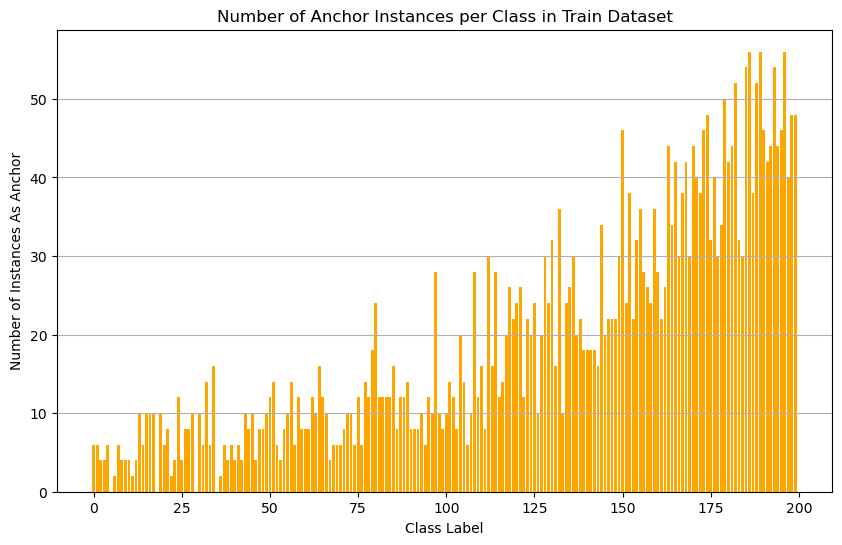

In [64]:
import matplotlib.pyplot as plt

instance_counts = list(count_dict.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(class_labels, instance_counts, color='orange')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances As Anchor')
plt.title('Number of Anchor Instances per Class in Train Dataset')
plt.grid(axis='y')

# Show the plot
plt.show()